<a href="https://colab.research.google.com/github/Renan-Domingues/Learn-PyTorch-in-a-day-Daniel-Bourk/blob/main/01_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. Create a straight line dataset using the linear regression formula (weight * X + bias).

- Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
- Split the data into 80% training, 20% testing.
- Plot the training and testing data so it becomes visual.



In [3]:
import torch
import matplotlib.pyplot as plt


In [5]:
weight = 0.3
bias = 0.9

start = 0
step = 0.02
end = 2

X = torch.arange(start, end, step).unsqueeze(dim=1) # Remember the unsqueeze next time
y = weight * X + bias


print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
y: tensor([[0.9000],
        [0.9060],
        [0.9120],
        [0.9180],
        [0.9240],
        [0.9300],
        [0.9360],
        [0.9420],
        [0.9480],
        [0.9540]])


In [6]:
split_data = int(len(X) * 0.8)

X_train = X[:split_data]
y_train = y[:split_data]

X_test = X[split_data:]
y_test = y[split_data:]

print(f"X_train: {len(X_train)} y_train: {len(y_train)}\nX_test: {len(X_test)} y_test: {len(y_test)}")

X_train: 80 y_train: 80
X_test: 20 y_test: 20


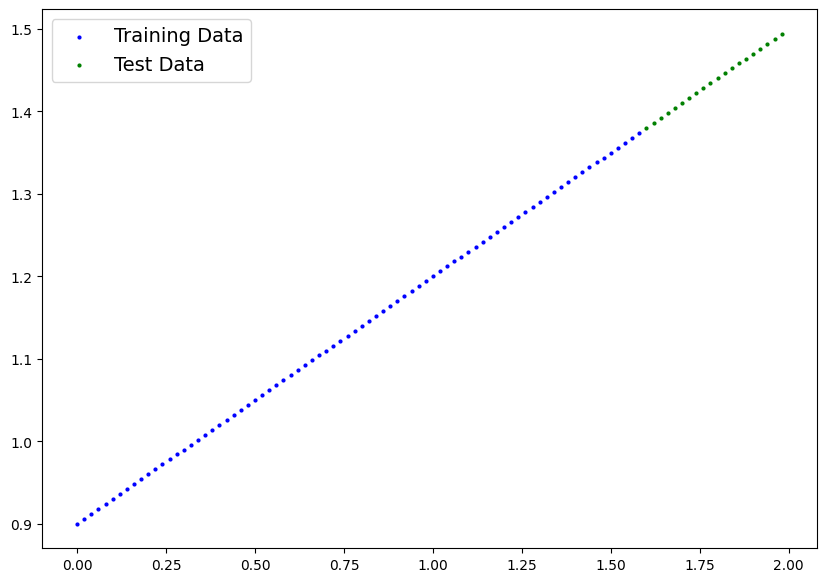

In [4]:
def plot_predictions(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions=None):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c='b',s = 4, label='Training Data')
  plt.scatter(test_data, test_labels, c='g', s=4, label = 'Test Data')

  if predictions is not None:
    plt.scatter(test_data,predictions,c='g', s=4, label = 'Prediction')
  plt.legend(prop = {"size": 14})

plot_predictions()

# Build a PyTorch model by subclassing ***nn.Module***.


- Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
- Implement the forward() method to compute the linear regression function you used to create the dataset in 1.
- Once you've constructed the model, make an instance of it and check its state_dict().
- Note: If you'd like to use nn.Linear() instead of nn.Parameter() you can.


In [7]:
from torch import nn

# Create PyTorch linear regression model by subclassing nn.Module

class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear1 = nn.Linear(in_features=1, out_features=5)
    self.linear2 = nn.Linear(in_features=5, out_features=1)

  def forward(self, x):
    return self.linear2(self.linear1(x))

model = LinearRegression()

print(model)
print(model.state_dict())




LinearRegression(
  (linear1): Linear(in_features=1, out_features=5, bias=True)
  (linear2): Linear(in_features=5, out_features=1, bias=True)
)
OrderedDict([('linear1.weight', tensor([[ 0.7685],
        [ 0.4119],
        [ 0.2538],
        [-0.4808],
        [-0.3069]])), ('linear1.bias', tensor([-0.5446, -0.1854, -0.4499,  0.3909, -0.5426])), ('linear2.weight', tensor([[-0.2353,  0.1352, -0.4365, -0.2260, -0.2409]])), ('linear2.bias', tensor([-0.3957]))])


In [8]:
# Instantiate the model and put it to the target device

device = "cuda" if torch.cuda.is_available() else "cpu"

model.to(device)


LinearRegression(
  (linear1): Linear(in_features=1, out_features=5, bias=True)
  (linear2): Linear(in_features=5, out_features=1, bias=True)
)

# 3. Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.


- Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
- Write a training loop to perform the appropriate training steps for 300 epochs.
- The training loop should test the model on the test dataset every 20 epochs.


In [9]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [10]:
epochs = 300

X_train  =  X_train.to(device)
y_train = y_train.to(device)

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model.train()
  # forward pass
  y_pred = model(X_train)
  # Calculate the loss
  loss = loss_fn(y_pred, y_train)
  # Optimizers
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # let's test
  if epoch % 20 == 0:
    model.eval()
    with torch.inference_mode():

      # forward pass
      test_pred = model(X_test)
      # calculate the loss
      test_loss = loss_fn(test_pred, y_test)

      # print out what is happening
      print(f'Epoch: {epoch} | Loss: {loss} | Test loss {test_loss}')


Epoch: 0 | Loss: 1.232986330986023 | Test loss 1.5574129819869995
Epoch: 20 | Loss: 0.7219613790512085 | Test loss 0.9061436653137207
Epoch: 40 | Loss: 0.05128813907504082 | Test loss 0.024423515424132347
Epoch: 60 | Loss: 0.025473764166235924 | Test loss 0.029368950054049492
Epoch: 80 | Loss: 0.021782252937555313 | Test loss 0.03429780155420303
Epoch: 100 | Loss: 0.01810315065085888 | Test loss 0.039209384471178055
Epoch: 120 | Loss: 0.014435851946473122 | Test loss 0.044104721397161484
Epoch: 140 | Loss: 0.010780125856399536 | Test loss 0.048983603715896606
Epoch: 160 | Loss: 0.007136406842619181 | Test loss 0.05384616181254387
Epoch: 180 | Loss: 0.0060512530617415905 | Test loss 0.04890407994389534
Epoch: 200 | Loss: 0.0061869374476373196 | Test loss 0.053759295493364334
Epoch: 220 | Loss: 0.006359528284519911 | Test loss 0.05269951373338699
Epoch: 240 | Loss: 0.0052589974366128445 | Test loss 0.05362614989280701
Epoch: 260 | Loss: 0.007934450171887875 | Test loss 0.0487090907990932

# 4. Make predictions with the trained model on the test data.
- Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [17]:
model.eval()
with torch.inference_mode():
  y_pred = model(X_test)

print(y_pred)

tensor([[1.3843],
        [1.3902],
        [1.3962],
        [1.4021],
        [1.4081],
        [1.4140],
        [1.4199],
        [1.4259],
        [1.4318],
        [1.4377],
        [1.4437],
        [1.4496],
        [1.4555],
        [1.4615],
        [1.4674],
        [1.4733],
        [1.4793],
        [1.4852],
        [1.4911],
        [1.4971]], device='cuda:0')


# 5. Save your trained model's state_dict() to file.

- Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.
- Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.


In [12]:
from pathlib import Path

MODEL_PATH = Path('model')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "my_model"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model.state_dict(), f=MODEL_SAVE_PATH)

In [13]:
loaded_model = LinearRegression()
loaded_model.load_state_dict(torch.load(f = MODEL_SAVE_PATH))
loaded_model.to(device)

LinearRegression(
  (linear1): Linear(in_features=1, out_features=5, bias=True)
  (linear2): Linear(in_features=5, out_features=1, bias=True)
)

In [18]:
new_y_pred = loaded_model(X_test)

new_y_pred == y_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')